Banco: TCGA

Redução: PCA

Machine Learning: SVM, RL, RF e GBM

Deep Learning: MLP E CNN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [3]:
df = pd.read_csv("C:/Users/ana_v/OneDrive/Área de Trabalho/GitHub/breastcancer-classification/TCGA Repository/TCGA.csv", low_memory=False)
df

,Sample,Type,ENSG00000167578.15,ENSG00000078237.5,ENSG00000146083.10,ENSG00000198242.12,ENSG00000134108.11,ENSG00000172137.17,ENSG00000167700.7,ENSG00000060642.9,...,ENSG00000133313.13,ENSG00000134470.18,ENSG00000066044.12,ENSG00000146587.16,ENSG00000107863.15,ENSG00000213782.6,ENSG00000146707.13,ENSG00000135094.9,ENSG00000105063.17,ENSG00000123685.7
0,TCGA-A8-A09T-01A-11R-A00Z-07,LumA,2.526466,5.246044,8.815067,161.766669,54.826009,0.727154,16.390587,10.961095,...,24.359726,0.971962,14.993399,4.471032,6.697813,0.332888,2.146511,1.169427,15.036856,0.117793
1,TCGA-A8-A097-01A-11R-A034-07,LumA,3.273986,2.943726,7.278192,144.831152,64.307958,1.468992,3.188953,8.020554,...,10.526284,2.312490,10.946377,4.724053,6.598522,0.153638,1.856379,4.529729,20.767375,0.548877
2,TCGA-EW-A3E8-01B-11R-A24H-07,LumA,7.095210,3.198978,13.300451,169.876804,23.337992,11.567971,32.482566,7.537276,...,21.291924,4.698825,13.518863,2.972950,3.688014,0.843909,5.621075,11.247794,16.495290,1.011621
3,TCGA-BH-A18H-01A-11R-A12D-07,LumA,3.365683,3.337737,13.655772,123.382615,45.077330,0.656728,10.002689,4.378102,...,19.174761,5.148678,13.129060,3.657460,5.566987,0.419692,4.389702,29.610989,44.737327,1.917813
4,TCGA-A8-A091-01A-11R-A00Z-07,LumA,2.660908,1.343664,10.718570,97.067348,40.657102,0.626659,23.075875,10.777108,...,15.215213,0.984159,14.328043,3.180887,4.545997,0.362994,2.703434,3.097400,12.555617,0.272948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,TCGA-BH-A208-01A-11R-A157-07,Normal,2.044676,2.896645,5.357835,104.060567,24.899434,1.226826,3.143263,4.356158,...,11.270243,3.491451,8.763280,2.394854,8.110247,0.234703,3.037806,3.725608,8.755835,0.628538
931,TCGA-EW-A1PG-01A-11R-A144-07,Normal,1.676433,6.067542,9.007881,169.008639,39.875050,3.079435,5.599097,6.187447,...,15.742505,4.001438,14.911573,4.520929,8.651855,0.431440,2.144421,2.901999,9.400345,2.121605
932,TCGA-D8-A1XW-01A-11R-A14M-07,Normal,1.753544,4.411847,4.480512,97.908649,42.120383,433.184971,7.703019,5.506214,...,21.287429,2.471078,13.807654,4.514290,12.552364,0.279996,3.635332,4.505835,11.035697,0.474258
933,TCGA-BH-A1FU-11A-23R-A14D-07,Normal,2.421144,2.534733,12.356319,152.637571,30.352043,13.853861,6.080970,7.832526,...,13.694750,3.055594,9.879481,5.300372,13.109236,0.595596,7.300974,0.788372,11.331833,0.650283


In [11]:
# Obtém os valores únicos na coluna 'Type'
unique_types = df['Type'].unique()

# Cria um dicionário mapeando cada tipo único para um número
type_to_numeric = {type_name: index for index, type_name in enumerate(unique_types)}

# Aplica a substituição usando o método map
df['Type'] = df['Type'].map(type_to_numeric)

# Armazena a coluna 'Type' para adicioná-la de volta posteriormente
type_column = df['Type']

# Prepara o DataFrame para normalização (remover colunas desnecessárias)
df_num = df.drop(columns=["Sample", "Type"])

# Normalizar os dados
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(df_num)
df_normalizado = pd.DataFrame(dados_normalizados, columns=df_num.columns)
df_normalizado

,ENSG00000167578.15,ENSG00000078237.5,ENSG00000146083.10,ENSG00000198242.12,ENSG00000134108.11,ENSG00000172137.17,ENSG00000167700.7,ENSG00000060642.9,ENSG00000182141.8,ENSG00000102174.8,...,ENSG00000133313.13,ENSG00000134470.18,ENSG00000066044.12,ENSG00000146587.16,ENSG00000107863.15,ENSG00000213782.6,ENSG00000146707.13,ENSG00000135094.9,ENSG00000105063.17,ENSG00000123685.7
0,-0.387287,0.910385,-0.414945,-0.088275,1.269936,-0.340828,0.148311,1.367226,-0.301109,0.310879,...,0.936836,-0.810936,0.229714,-0.028465,-0.284177,-0.159313,-0.795728,-0.502678,0.133476,-0.973007
1,0.011245,-0.402596,-0.812393,-0.267283,1.963636,-0.317216,-0.946789,0.340975,-0.380684,0.461779,...,-0.955256,-0.343359,-0.828300,0.113548,-0.301170,-0.733498,-0.897408,0.120467,1.027997,-0.153698
2,2.048488,-0.257029,0.745012,-0.002551,-1.033727,0.004227,1.483172,0.172311,-0.380479,-0.375193,...,0.517233,0.488995,-0.155775,-0.869293,-0.799283,1.477619,0.421972,1.366287,0.361134,0.725782
3,0.060133,-0.177897,0.836901,-0.493994,0.556723,-0.343070,-0.381577,-0.930243,-0.124225,-0.298208,...,0.227654,0.645904,-0.257681,-0.485098,-0.477710,0.118743,-0.009577,4.771617,4.769654,2.448069
4,-0.315611,-1.315090,0.077317,-0.772147,0.233339,-0.344027,0.702869,1.303014,0.234958,-0.552289,...,-0.313920,-0.806682,0.055769,-0.752584,-0.652445,-0.062877,-0.600548,-0.145148,-0.253840,-0.678124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,-0.644148,-0.429446,-1.309013,-0.698229,-0.919492,-0.324924,-0.950579,-0.937901,-0.620061,-0.256754,...,-0.853500,0.067863,-1.399028,-1.193761,-0.042449,-0.473825,-0.483364,-0.028651,-0.846978,-0.002296
931,-0.840473,1.378875,-0.365081,-0.011727,0.176124,-0.265957,-0.746863,-0.298780,0.418030,-0.105212,...,-0.241799,0.245746,0.208322,-0.000459,0.050244,0.156374,-0.796461,-0.181384,-0.746371,2.835392
932,-0.799361,0.434654,-1.535896,-0.763254,0.340393,13.423960,-0.572339,-0.536531,1.024688,8.968652,...,0.516618,-0.288044,-0.080276,-0.004185,0.717789,-0.328741,-0.273954,0.116036,-0.491097,-0.295518
933,-0.443438,-0.635839,0.500852,-0.184769,-0.520579,0.076985,-0.706891,0.275353,0.767245,-0.226048,...,-0.521884,-0.084164,-1.107219,0.437019,0.813094,0.682209,1.010711,-0.573342,-0.444870,0.039031


PCA

In [12]:
# Aplicação do PCA
pca = PCA(n_components=0.8)  
pca.fit(dados_normalizados)
dados_pca = pca.fit(dados_normalizados)

# Componentes Principais (Eigenvectors)
df_eigenvectors = pd.DataFrame(pca.components_, columns=
df_normalizado.columns)

# Autovalores (Eigenvalues)
df_eigenvalues = pd.DataFrame({"Eigenvalues": pca.explained_variance_})

# Variância explicada percentual
df_variance_percent = pd.DataFrame({"Variance Percent": 
    pca.explained_variance_ratio_ * 100})

# Variância explicada cumulativa percentual
cumulative_variance_percent = np.cumsum(pca.explained_variance_ratio_ * 100)
df_cumulative_variance_percent = pd.DataFrame({"Cumulative Variance Percent": 
    cumulative_variance_percent})

# Número de dimensões necessárias para garantir 80% de variância cumulativa
num_dimensions_for_80_percent = np.argmax(cumulative_variance_percent >= 80)+1
print(f'Nº de dim p/ 80% de var cumulativa: {num_dimensions_for_80_percent}')

# Combinar os DataFrames
df_combined = pd.concat([df_eigenvectors, df_eigenvalues, df_variance_percent,
                        df_cumulative_variance_percent], axis=1)
principal=PCA(n_components=184)
principal.fit(dados_normalizados) 
x = principal.transform(dados_normalizados)
dim = pd.DataFrame(data=x)
dim


# Adicionar a coluna 'Type' de volta ao DataFrame final
dim['Type'] = type_column.values

# Salvar o CSV final
output_path = "C:/Users/ana_v/OneDrive/Documentos/Mestrado/MachineLearning/TCGA_PCA_transformed_with_Type.csv"
dim.to_csv(output_path, index=False)

print(f"Arquivo salvo em: {output_path}")


Nº de dim p/ 80% de var cumulativa: 184
Arquivo salvo em: C:/Users/ana_v/OneDrive/Documentos/Mestrado/MachineLearning/TCGA_PCA_transformed_with_Type.csv


MACHINE LEARNING

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize
import seaborn as sns

In [9]:
# Divisão de treino e teste com a função random_state usada para garantir a reprodutibilidade dos resultados
X_train, X_test, y_train, y_test = train_test_split(dim, df['Type'], test_size=0.2, random_state=42)

# Contar a quantidade de cada classe nos conjuntos de treino e teste
train_class_counts = y_train.value_counts()
test_class_counts = y_test.value_counts()

# Imprimir as contagens
print('Quantidade de cada classe no conjunto de treinamento:')
print(train_class_counts)
print('')
print('Quantidade de cada classe no conjunto de teste:')
print(test_class_counts)

Quantidade de cada classe no conjunto de treinamento:
Type
0    383
1    159
2    128
3     59
4     19
Name: count, dtype: int64

Quantidade de cada classe no conjunto de teste:
Type
0    97
1    38
2    29
3    15
4     8
Name: count, dtype: int64


Regressão Logística - Acurácia (Treinamento): 1.0
Regressão Logística - Acurácia (Teste): 0.679144385026738
Acurácia média na validação cruzada: 0.7155113246396707

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.74      0.75        97
           1       0.51      0.53      0.52        38
           2       0.81      0.72      0.76        29
           3       0.53      0.67      0.59        15
           4       0.44      0.50      0.47         8

    accuracy                           0.68       187
   macro avg       0.61      0.63      0.62       187
weighted avg       0.69      0.68      0.68       187



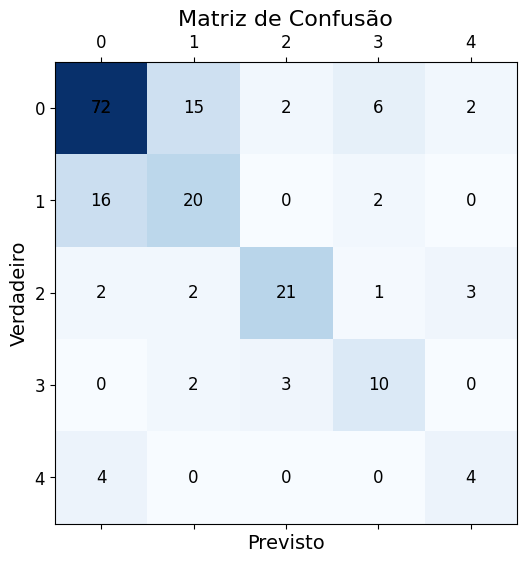

In [10]:
# Regressão Logística
lr_model = LogisticRegression(max_iter=6500) 
lr_model.fit(X_train, y_train) 
lr_predictions_train = lr_model.predict(X_train)  
lr_predictions_test = lr_model.predict(X_test) 

# Avaliação Regressão Logística
lr_accuracy_train = accuracy_score(y_train, lr_predictions_train) 
lr_accuracy_test = accuracy_score(y_test, lr_predictions_test)  
lr_report = classification_report(y_test, lr_predictions_test)  

# Criar um objeto de validação cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Substituir a divisão de treino e teste pelo código de validação cruzada
scores = cross_val_score(lr_model, dim, df['Type'], cv=cv, scoring='accuracy')

# Imprimir os resultados
print(f'Regressão Logística - Acurácia (Treinamento): {lr_accuracy_train}')
print(f'Regressão Logística - Acurácia (Teste): {lr_accuracy_test}')
print(f'Acurácia média na validação cruzada: {scores.mean()}')
print('')
print(f'Classification Report:\n{lr_report}')

# Defina as classes com base nos seus dados
classes = df['Type'].unique()

# Matriz de Confusão
confusion = confusion_matrix(y_test, lr_predictions_test)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(confusion, cmap='Blues')
def add_text(x, y, val):
    plt.text(x, y, str(val), va='center', ha='center', color='black', 
             fontsize=12)
add_text_vectorized = np.vectorize(add_text)
add_text_vectorized(*np.meshgrid(range(len(classes)), range(len(classes))), 
                    confusion)
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Previsto', fontsize=14)
plt.ylabel('Verdadeiro', fontsize=14)
plt.xticks(range(len(classes)), classes, fontsize=12)
plt.yticks(range(len(classes)), classes, fontsize=12)
plt.show()


SVM - Acurácia (Treinamento): 0.9010695187165776
SVM - Acurácia (Teste): 0.7593582887700535
Acurácia média na validação cruzada: 0.7861702127659574

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.92      0.82        97
           1       0.68      0.50      0.58        38
           2       0.84      0.90      0.87        29
           3       0.89      0.53      0.67        15
           4       1.00      0.00      0.00         8

    accuracy                           0.76       187
   macro avg       0.83      0.57      0.59       187
weighted avg       0.77      0.76      0.73       187



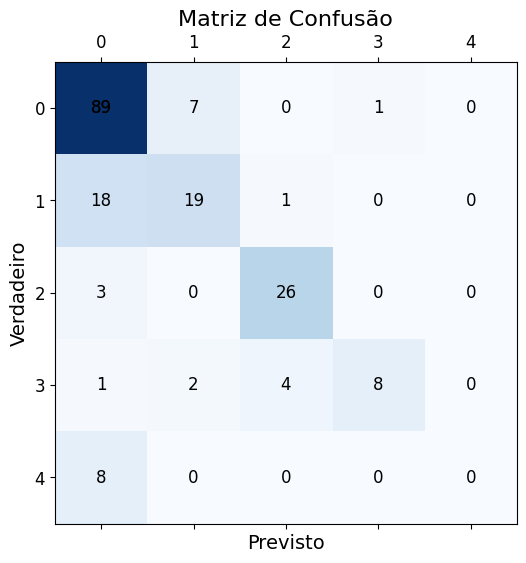

In [11]:
# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)  
svm_predictions_train = svm_model.predict(X_train)  
svm_predictions_test = svm_model.predict(X_test) 

# Avaliação SVM
svm_accuracy_train = accuracy_score(y_train, svm_predictions_train)  
svm_accuracy_test = accuracy_score(y_test, svm_predictions_test)  
svm_report = classification_report(y_test, svm_predictions_test, zero_division=1)  

# Criar um objeto de validação cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Substituir a divisão de treino e teste pelo código de validação cruzada
scores = cross_val_score(svm_model, dim, df['Type'], cv=cv, 
                         scoring='accuracy')

# Exibindo resultados
print(f'SVM - Acurácia (Treinamento): {svm_accuracy_train}')
print(f'SVM - Acurácia (Teste): {svm_accuracy_test}')
print(f'Acurácia média na validação cruzada: {scores.mean()}')
print('')
print(f'Classification Report:\n{svm_report}')

# Defina as classes com base nos seus dados
classes = df['Type'].unique()

# Matriz de Confusão
confusion = confusion_matrix(y_test, svm_predictions_test)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(confusion, cmap='Blues')
def add_text(x, y, val):
    plt.text(x, y, str(val), va='center', ha='center', color='black', 
             fontsize=12)
add_text_vectorized = np.vectorize(add_text)
add_text_vectorized(*np.meshgrid(range(len(classes)), range(len(classes))), 
                    confusion)
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Previsto', fontsize=14)
plt.ylabel('Verdadeiro', fontsize=14)
plt.xticks(range(len(classes)), classes, fontsize=12)
plt.yticks(range(len(classes)), classes, fontsize=12)
plt.show()



Random Forest - Acurácia (Treinamento): 1.0
Random Forest - Acurácia (Teste): 0.7165775401069518
Acurácia média na validação cruzada: 0.7293868679935942

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.69      0.94      0.79        97
           1       0.62      0.39      0.48        38
           2       0.90      0.90      0.90        29
           3       1.00      0.13      0.24        15
           4       1.00      0.00      0.00         8

    accuracy                           0.72       187
   macro avg       0.84      0.47      0.48       187
weighted avg       0.75      0.72      0.67       187



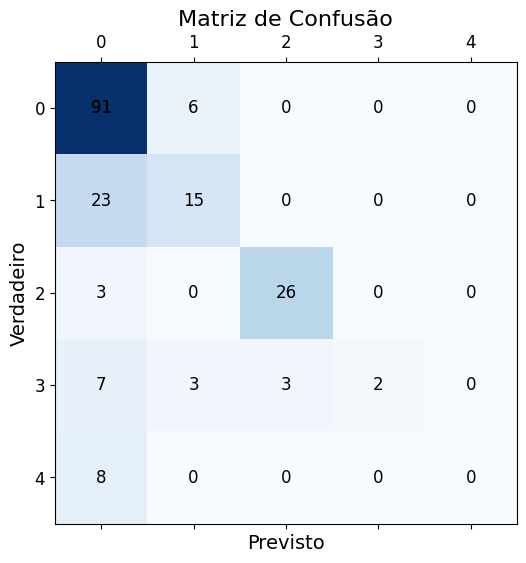

In [12]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)  
rf_predictions_train = rf_model.predict(X_train)  
rf_predictions_test = rf_model.predict(X_test) 

# Avaliação Random Forest
rf_accuracy_train = accuracy_score(y_train, rf_predictions_train) 
rf_accuracy_test = accuracy_score(y_test, rf_predictions_test) 
rf_report = classification_report(y_test, rf_predictions_test, 
                                  zero_division=1) 

# Criar um objeto de validação cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Substituir a divisão de treino e teste pelo código de validação cruzada
scores = cross_val_score(rf_model, dim, df['Type'], cv=cv, scoring='accuracy')

#Exibindo resultados
print(f'Random Forest - Acurácia (Treinamento): {rf_accuracy_train}')
print(f'Random Forest - Acurácia (Teste): {rf_accuracy_test}')
print(f'Acurácia média na validação cruzada: {scores.mean()}')
print('')
print(f'Classification Report (Random Forest):\n{rf_report}')

# Defina as classes com base nos seus dados
classes = df['Type'].unique()

# Matriz de Confusão
confusion = confusion_matrix(y_test, rf_predictions_test)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(confusion, cmap='Blues')
def add_text(x, y, val):
    plt.text(x, y, str(val), va='center', ha='center', color='black', 
             fontsize=12)
add_text_vectorized = np.vectorize(add_text)
add_text_vectorized(*np.meshgrid(range(len(classes)), range(len(classes))), 
                    confusion)
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Previsto', fontsize=14)
plt.ylabel('Verdadeiro', fontsize=14)
plt.xticks(range(len(classes)), classes, fontsize=12)
plt.yticks(range(len(classes)), classes, fontsize=12)
plt.show()

GBM - Acurácia (Treinamento): 1.0
GBM - Acurácia (Teste): 0.7540106951871658
Acurácia média na validação cruzada: 0.7551018073667354

Classification Report GBM:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        97
           1       0.63      0.45      0.52        38
           2       0.87      0.90      0.88        29
           3       0.80      0.53      0.64        15
           4       0.50      0.12      0.20         8

    accuracy                           0.75       187
   macro avg       0.71      0.58      0.61       187
weighted avg       0.74      0.75      0.73       187



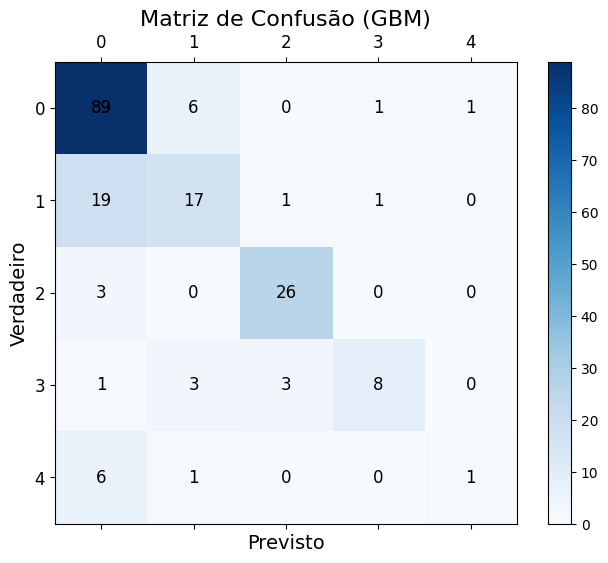

In [13]:
# Criação do modelo GBM
gbm_model = GradientBoostingClassifier()

# Ajuste do modelo nos dados de treino
gbm_model.fit(X_train, y_train)

# Previsões no conjunto de treino e teste
gbm_predictions_train = gbm_model.predict(X_train)
gbm_predictions_test = gbm_model.predict(X_test)

# Avaliação do GBM
gbm_accuracy_train = accuracy_score(y_train, gbm_predictions_train)
gbm_accuracy_test = accuracy_score(y_test, gbm_predictions_test)
gbm_report = classification_report(y_test, gbm_predictions_test)

# Criação do objeto de validação cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Aplicação da validação cruzada no modelo GBM
scores = cross_val_score(gbm_model, dim, df['Type'], cv=cv, scoring='accuracy')

# Imprimir os resultados
print(f'GBM - Acurácia (Treinamento): {gbm_accuracy_train}')
print(f'GBM - Acurácia (Teste): {gbm_accuracy_test}')
print(f'Acurácia média na validação cruzada: {scores.mean()}')
print('')
print(f'Classification Report GBM:\n{gbm_report}')

# Definir as classes com base nos seus dados
classes = df['Type'].unique()

# Matriz de Confusão
confusion = confusion_matrix(y_test, gbm_predictions_test)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(confusion, cmap='Blues')

# Função para adicionar texto na matriz de confusão
def add_text(x, y, val):
    plt.text(x, y, str(val), va='center', ha='center', color='black', fontsize=12)

# Vetorização da função para aplicar na matriz de confusão
add_text_vectorized = np.vectorize(add_text)
add_text_vectorized(*np.meshgrid(range(len(classes)), range(len(classes))), confusion)

plt.title('Matriz de Confusão (GBM)', fontsize=16)
plt.xlabel('Previsto', fontsize=14)
plt.ylabel('Verdadeiro', fontsize=14)
plt.xticks(range(len(classes)), classes, fontsize=12)
plt.yticks(range(len(classes)), classes, fontsize=12)
plt.colorbar(cax)
plt.show()


DEEP LEARNING

In [14]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D, SimpleRNN, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MLP - Acurácia (Treinamento): 1.0
MLP - Acurácia (Teste): 0.7379679144385026
Acurácia média na validação cruzada (MLP): 0.7336650652024709

Classification Report MLP:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        97
           1       0.61      0.53      0.56        38
           2       0.88      0.79      0.84        29
           3       0.63      0.80      0.71        15
           4       0.33      0.12      0.18         8

    accuracy                           0.74       187
   macro avg       0.65      0.62      0.62       187
weighted avg       0.73      0.74      0.73       187



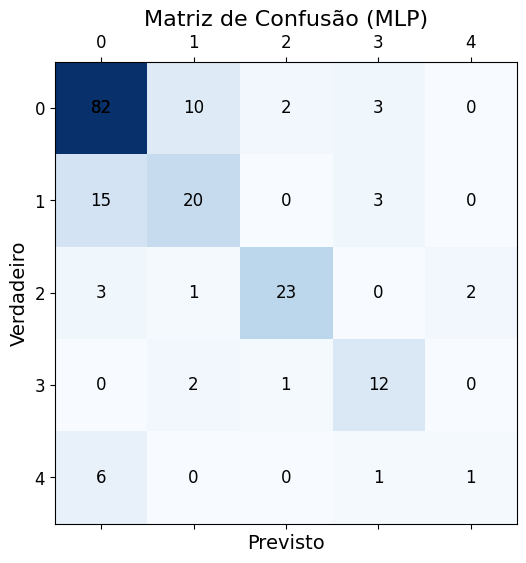

In [15]:
# Criação e treinamento do MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Predições no conjunto de treino e teste
mlp_predictions_train = mlp_model.predict(X_train)
mlp_predictions_test = mlp_model.predict(X_test)

# Avaliação MLP
mlp_accuracy_train = accuracy_score(y_train, mlp_predictions_train)
mlp_accuracy_test = accuracy_score(y_test, mlp_predictions_test)
mlp_report = classification_report(y_test, mlp_predictions_test, zero_division=1)

# Criar um objeto de validação cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Substituir a divisão de treino e teste pelo código de validação cruzada
mlp_scores = cross_val_score(mlp_model, dim, df['Type'], cv=cv, scoring='accuracy')

# Exibindo resultados do MLP
print(f'MLP - Acurácia (Treinamento): {mlp_accuracy_train}')
print(f'MLP - Acurácia (Teste): {mlp_accuracy_test}')
print(f'Acurácia média na validação cruzada (MLP): {mlp_scores.mean()}')
print('')
print(f'Classification Report MLP:\n{mlp_report}')

# Defina as classes com base nos seus dados
classes = df['Type'].unique()

# Matriz de Confusão do MLP
mlp_confusion = confusion_matrix(y_test, mlp_predictions_test)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(mlp_confusion, cmap='Blues')
def add_text(x, y, val):
    plt.text(x, y, str(val), va='center', ha='center', color='black', fontsize=12)
add_text_vectorized = np.vectorize(add_text)
add_text_vectorized(*np.meshgrid(range(len(classes)), range(len(classes))), mlp_confusion)
plt.title('Matriz de Confusão (MLP)', fontsize=16)
plt.xlabel('Previsto', fontsize=14)
plt.ylabel('Verdadeiro', fontsize=14)
plt.xticks(range(len(classes)), classes, fontsize=12)
plt.yticks(range(len(classes)), classes, fontsize=12)
plt.show()

In [16]:
# Supondo que dim e df['Type'] estejam definidos corretamente
unique_types = df['Type'].unique()
num_classes = len(unique_types)

# Convertendo unique_types para strings
target_names = [str(cls) for cls in unique_types]

# Divisão de treino e teste com random_state para reprodutibilidade
X_train, X_test, y_train, y_test = train_test_split(dim, df['Type'], test_size=0.2, random_state=42)

# Expansão das dimensões de X_train e X_test (somente uma vez)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Verificar as dimensões de X_train e X_test
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

# Função para criar o modelo CNN
def create_cnn_model():
    model = Sequential([
        Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(2),
        Conv1D(64, 3, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # num_classes deve ser o número de classes únicas
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy se y_train não estiver one-hot
                  metrics=['accuracy'])
    return model

# Validação cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = []

for train_index, val_index in kfold.split(X_train):
    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]

    model = create_cnn_model()
    history = model.fit(X_fold_train, y_fold_train, epochs=25, batch_size=32, verbose=0, validation_data=(X_fold_val, y_fold_val))

    val_accuracy = history.history['val_accuracy'][-1]
    cross_val_scores.append(val_accuracy)

cross_val_mean = np.mean(cross_val_scores)
cross_val_std = np.std(cross_val_scores)

# Treinamento final da CNN
model = create_cnn_model()
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Avaliação da CNN no conjunto de teste
cnn_loss, cnn_accuracy = model.evaluate(X_test, y_test)

# Exibindo resultados da CNN
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Predições da CNN no conjunto de teste
cnn_predictions = model.predict(X_test)
cnn_predictions_classes = np.argmax(cnn_predictions, axis=1)

# Classification report da CNN
cnn_report = classification_report(y_test, cnn_predictions_classes, target_names=target_names, zero_division=1, digits=2)



Shape of X_train: (748, 184, 1)
Shape of X_test: (187, 184, 1)


C:\Users\ana_v\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3903 - loss: 1.9164 - val_accuracy: 0.5455 - val_loss: 1.2451
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5714 - loss: 1.2362 - val_accuracy: 0.5989 - val_loss: 1.1226
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5993 - loss: 1.0728 - val_accuracy: 0.6257 - val_loss: 1.0050
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6536 - loss: 0.9433 - val_accuracy: 0.6257 - val_loss: 0.9245
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6745 - loss: 0.8833 - val_accuracy: 0.6257 - val_loss: 0.8799
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7047 - loss: 0.7979 - val_accuracy: 0.7059 - val_loss: 0.8514
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7028 - loss: 0.7468 - val_accuracy: 0.6952 - val_loss: 0.8421
Epoch 8/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7098 - loss: 0.7459 - val_accuracy: 0.7005 - val_

In [17]:
# Exibindo resultados da CNN
print(f'CNN - Acurácia (Treinamento): {train_accuracy}')
#print(f'CNN - Acurácia (Validação): {val_accuracy}')
print(f'CNN - Acurácia (Teste): {cnn_accuracy}')
print(f'CNN - Validação Cruzada - Média: {cross_val_mean} - Desvio Padrão: {cross_val_std}')

# Classification report da CNN
print(f'Classification Report CNN:\n{cnn_report}')

CNN - Acurácia (Treinamento): 0.856951892375946
CNN - Acurácia (Teste): 0.6951871514320374
CNN - Validação Cruzada - Média: 0.7165458559989929 - Desvio Padrão: 0.032825656349512726
Classification Report CNN:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        97
           1       0.43      0.39      0.41        38
           2       0.81      0.86      0.83        29
           3       0.67      0.67      0.67        15
           4       0.50      0.12      0.20         8

    accuracy                           0.70       187
   macro avg       0.63      0.57      0.58       187
weighted avg       0.68      0.70      0.68       187



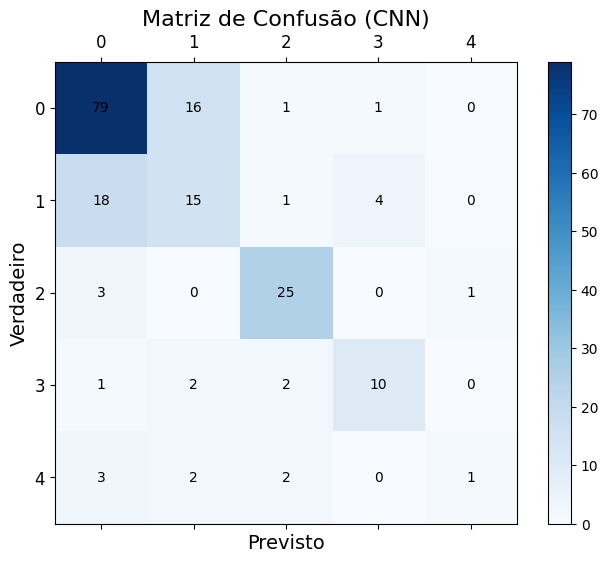

In [18]:
# Matriz de Confusão da CNN
cnn_confusion = confusion_matrix(y_test, cnn_predictions_classes)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(cnn_confusion, cmap='Blues')
plt.title('Matriz de Confusão (CNN)', fontsize=16)
plt.xlabel('Previsto', fontsize=14)
plt.ylabel('Verdadeiro', fontsize=14)
plt.xticks(range(num_classes), target_names, fontsize=12)
plt.yticks(range(num_classes), target_names, fontsize=12)
plt.colorbar(cax)

# Adicionar os valores dentro dos quadrados da matriz de confusão
for i in range(cnn_confusion.shape[0]):
    for j in range(cnn_confusion.shape[1]):
        plt.text(j, i, cnn_confusion[i, j], ha='center', va='center', color='black')

plt.show()